In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance

In [4]:
data = pd.read_csv("/content/drive/MyDrive/traffic/word2vec_embeddings_2.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,-0.115389,0.167641,0.005611,0.077721,0.035231,-0.418558,0.250430,0.588360,-0.219463,-0.148530,...,0.142511,0.058506,0.052299,0.510375,0.205538,0.149276,-0.159245,0.003064,-0.052509,0
1,-0.160058,0.254479,-0.004553,0.115701,0.058204,-0.644816,0.391895,0.907401,-0.315561,-0.222099,...,0.213053,0.089531,0.087264,0.778928,0.297124,0.214132,-0.237614,-0.008224,-0.092571,1
2,-0.060645,0.093888,0.002453,0.041920,0.015457,-0.229201,0.138690,0.319078,-0.112474,-0.080268,...,0.080286,0.029502,0.029912,0.278254,0.111660,0.079019,-0.082592,0.000231,-0.029654,1
3,-0.155255,0.224523,0.002560,0.103480,0.061544,-0.569147,0.346265,0.802971,-0.288361,-0.202483,...,0.191995,0.077594,0.073364,0.686515,0.270421,0.202742,-0.211636,0.005442,-0.071872,1
4,-0.152083,0.205910,0.005084,0.096129,0.051720,-0.537328,0.316213,0.742970,-0.277591,-0.188420,...,0.180691,0.070645,0.065177,0.643143,0.255682,0.188484,-0.200673,0.002811,-0.064978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.137397,0.220092,0.001213,0.101662,0.044390,-0.544211,0.335588,0.768019,-0.271611,-0.193158,...,0.188840,0.075782,0.074729,0.664524,0.259386,0.181635,-0.202844,-0.003671,-0.078030,1
1996,-0.151190,0.238117,0.005249,0.110898,0.046261,-0.597633,0.364382,0.837748,-0.303684,-0.211329,...,0.208028,0.080575,0.079970,0.728079,0.286870,0.204014,-0.218397,0.001076,-0.081817,1
1997,-0.176330,0.276614,0.001875,0.130256,0.064000,-0.699117,0.426996,0.982623,-0.351131,-0.246254,...,0.237480,0.097120,0.095512,0.847221,0.330387,0.236422,-0.256781,0.000639,-0.098242,1
1998,-0.124438,0.204927,0.008494,0.095008,0.026502,-0.498372,0.307843,0.693583,-0.258274,-0.181310,...,0.180646,0.065610,0.069156,0.609640,0.248651,0.170915,-0.181969,0.003876,-0.057866,0


In [5]:
X=data.drop(["class"], axis=1)
y=data["class"]

In [6]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42,shuffle = True)

In [7]:
ttw1a = []
tw1a = []
tth1a = []
th1a = []
ttw1p = []
tw1p = []
tth1p = []
th1p = []
ttw1r = []
tw1r = []
tth1r = []
th1r = []
ttw1f = []
tw1f = []
tth1f = []
th1f = []

Accuracy of XGBoost: 0.9090909090909091
Precision of XGBoost: 0.9097825067652655
Recall of XGBoost: 0.9090909090909091
F1-score of XGBoost: 0.909026558434992
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       334
           1       0.93      0.89      0.91       326

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660



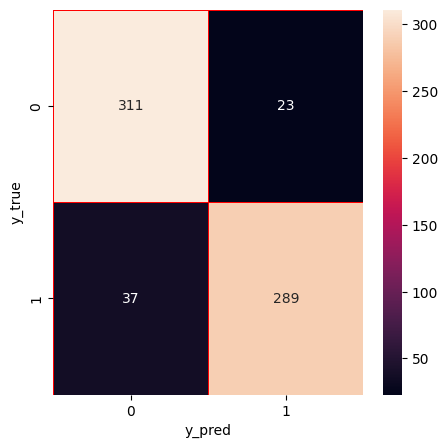

In [8]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
tw1a.append(xg_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.9835820895522388
Precision of XGBoost: 0.9837389929213916
Recall of XGBoost: 0.9835820895522388
F1-score of XGBoost: 0.9835816506645557
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       666
           1       0.99      0.97      0.98       674

    accuracy                           0.98      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.98      0.98      0.98      1340



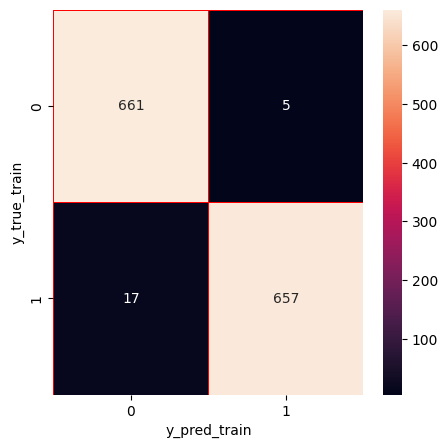

In [9]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(xg_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [10]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:34<00:00,  1.72s/trial, best loss: -0.9166666666666666]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.4607975240322543, 'max_depth': 57.0, 'n_estimators': 95.0}


Accuracy of XGBoost: 0.9121212121212121
Precision of XGBoost: 0.9126286241525003
Recall of XGBoost: 0.9121212121212121
F1-score of XGBoost: 0.9120727495543671
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       334
           1       0.93      0.89      0.91       326

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660



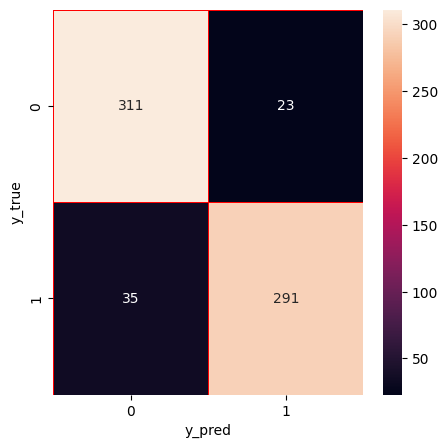

In [11]:
xg = xgb.XGBClassifier(learning_rate= 0.2885393750819613, n_estimators = 65, max_depth = 17)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(xg_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
F1-score of XGBoost: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       666
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



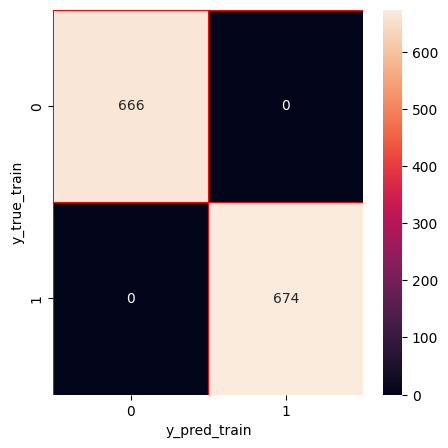

In [12]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(xg_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [13]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Accuracy of RF: 0.9136363636363637
Precision of RF: 0.915254087865494
Recall of RF: 0.9136363636363637
F1-score of RF: 0.9135153875219062
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       334
           1       0.94      0.88      0.91       326

    accuracy                           0.91       660
   macro avg       0.92      0.91      0.91       660
weighted avg       0.92      0.91      0.91       660



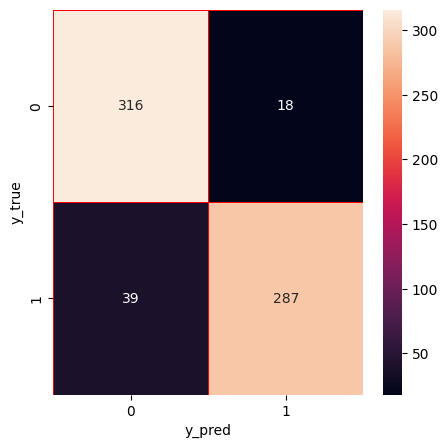

In [14]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(rf_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 1.0
Precision of RF: 1.0
Recall of RF: 1.0
F1-score of RF: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       666
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



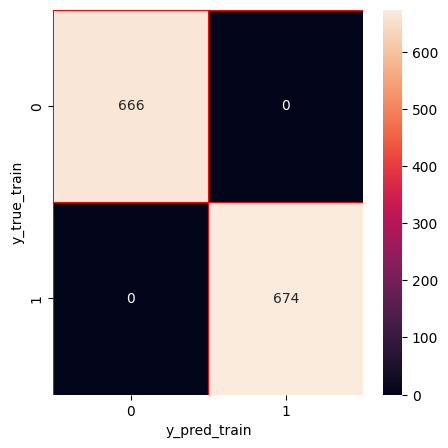

In [15]:
rf_score=rf.score(X_train,y_train)
y_predict=rf.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(rf_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [16]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:20<00:00,  1.05s/trial, best loss: -0.9196969696969697]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 8.0, 'max_features': 19.0, 'min_samples_leaf': 6.0, 'min_samples_split': 4.0, 'n_estimators': 129.0}


Accuracy of RF: 0.9151515151515152
Precision of RF: 0.9172879410106093
Recall of RF: 0.9151515151515152
F1-score of RF: 0.9150015675327702
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       334
           1       0.95      0.88      0.91       326

    accuracy                           0.92       660
   macro avg       0.92      0.91      0.91       660
weighted avg       0.92      0.92      0.92       660



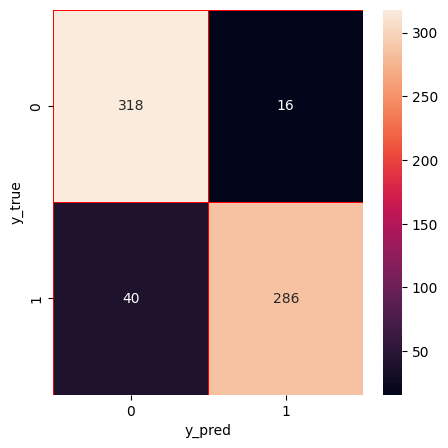

In [17]:
rf_hpo = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 9, max_depth = 13, min_samples_split = 6, max_features = 20, criterion = 'entropy')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(rf_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.9455223880597015
Precision of RF: 0.9462598786712377
Recall of RF: 0.9455223880597015
F1-score of RF: 0.9455068207648035
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       666
           1       0.96      0.93      0.94       674

    accuracy                           0.95      1340
   macro avg       0.95      0.95      0.95      1340
weighted avg       0.95      0.95      0.95      1340



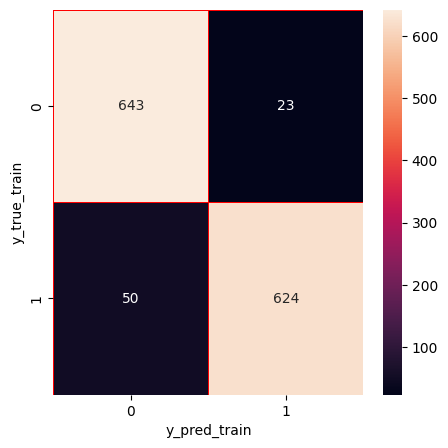

In [18]:
rf_score=rf_hpo.score(X_train,y_train)
y_predict=rf_hpo.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(rf_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [19]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

Accuracy of DT: 0.8454545454545455
Precision of DT: 0.8454826110344504
Recall of DT: 0.8454545454545455
F1-score of DT: 0.8454375100208432
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       334
           1       0.85      0.84      0.84       326

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660



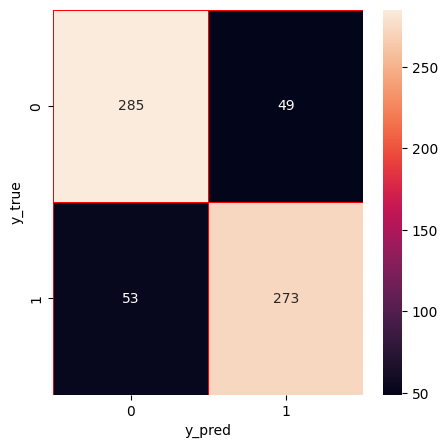

In [20]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(dt_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 1.0
Precision of DT: 1.0
Recall of DT: 1.0
F1-score of DT: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       666
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



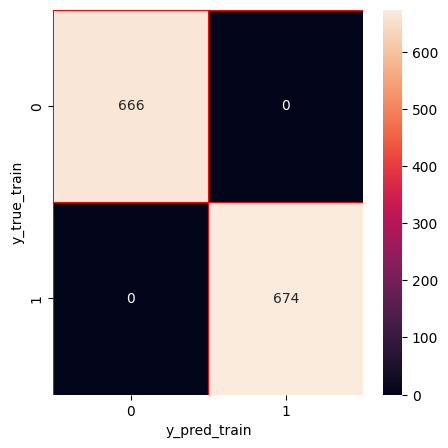

In [21]:
dt_score=dt.score(X_train,y_train)
y_predict=dt.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
ttw1a.append(dt_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [22]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:02<00:00, 21.62trial/s, best loss: -0.8818181818181818]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 6.0, 'max_features': 20.0, 'min_samples_leaf': 5.0, 'min_samples_split': 3.0}


Accuracy of DT: 0.8666666666666667
Precision of DT: 0.8685017327068458
Recall of DT: 0.8666666666666667
F1-score of DT: 0.8664310346943536
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       334
           1       0.89      0.83      0.86       326

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.87       660



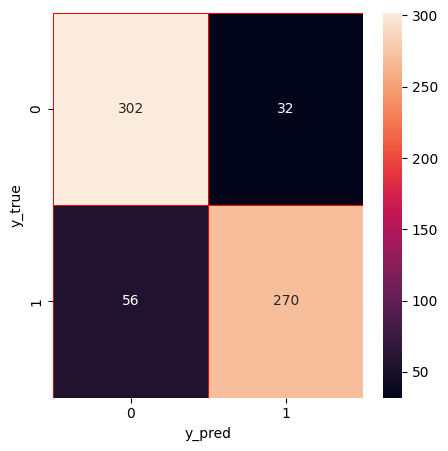

In [23]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 6, max_depth = 42, min_samples_split = 7, max_features = 15, criterion = 'entropy')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
th1a.append(dt_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.9380597014925374
Precision of DT: 0.9382876084372613
Recall of DT: 0.9380597014925374
F1-score of DT: 0.938056079355743
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       666
           1       0.95      0.93      0.94       674

    accuracy                           0.94      1340
   macro avg       0.94      0.94      0.94      1340
weighted avg       0.94      0.94      0.94      1340



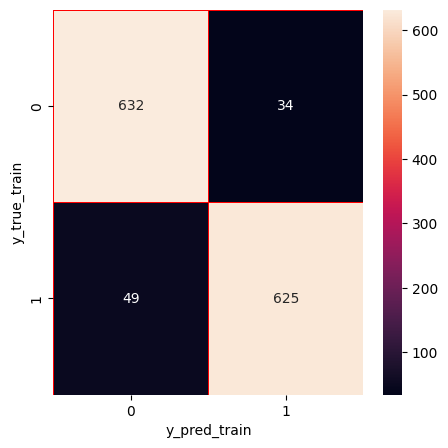

In [24]:
dt_score=dt_hpo.score(X_train,y_train)
y_predict=dt_hpo.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(dt_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [25]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

Accuracy of ET: 0.9166666666666666
Precision of ET: 0.9186334599846538
Recall of ET: 0.9166666666666666
F1-score of ET: 0.9165299631801718
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       334
           1       0.95      0.88      0.91       326

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



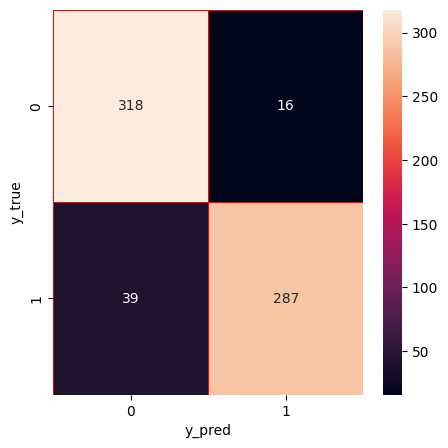

In [26]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
tw1a.append(et_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 1.0
Precision of ET: 1.0
Recall of ET: 1.0
F1-score of ET: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       666
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



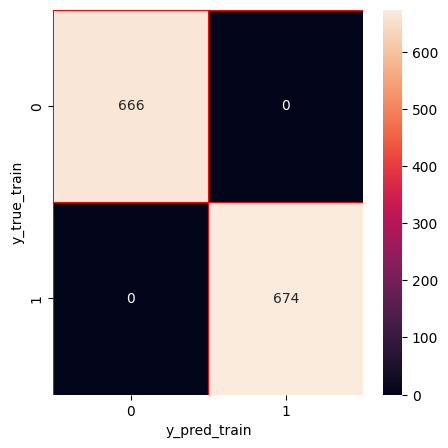

In [27]:
et_score=et.score(X_train,y_train)
y_predict=et.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(et_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [28]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:06<00:00,  3.11trial/s, best loss: -0.9212121212121213]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 41.0, 'max_features': 14.0, 'min_samples_leaf': 4.0, 'min_samples_split': 6.0, 'n_estimators': 166.0}


Accuracy of ET: 0.9136363636363637
Precision of ET: 0.9177193722571334
Recall of ET: 0.9136363636363637
F1-score of ET: 0.9133670737458541
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       334
           1       0.96      0.86      0.91       326

    accuracy                           0.91       660
   macro avg       0.92      0.91      0.91       660
weighted avg       0.92      0.91      0.91       660



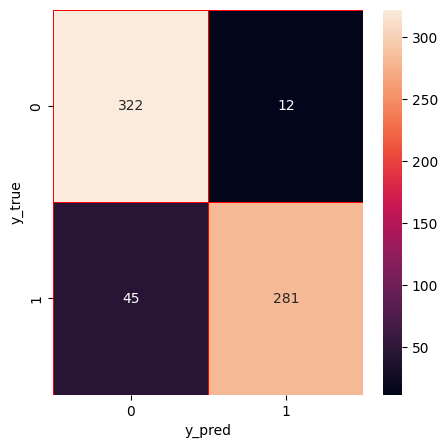

In [29]:
et_hpo = ExtraTreesClassifier(n_estimators = 94, min_samples_leaf = 9, max_depth = 10, min_samples_split = 5, max_features = 14, criterion = 'entropy')
et_hpo.fit(X_train,y_train)
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(et_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.9335820895522388
Precision of ET: 0.9357524669878894
Recall of ET: 0.9335820895522388
F1-score of ET: 0.9335142307623803
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       666
           1       0.97      0.90      0.93       674

    accuracy                           0.93      1340
   macro avg       0.94      0.93      0.93      1340
weighted avg       0.94      0.93      0.93      1340



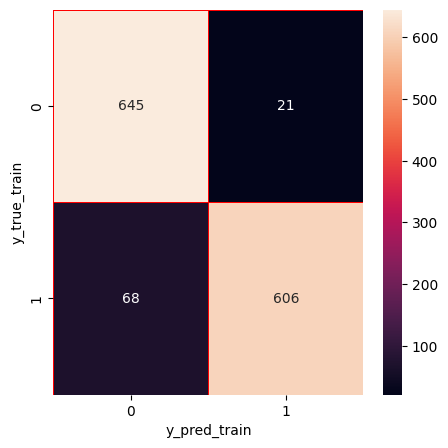

In [30]:
et_score=et_hpo.score(X_train,y_train)
y_predict=et_hpo.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(et_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [31]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

[LightGBM] [Info] Number of positive: 674, number of negative: 666
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 1340, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502985 -> initscore=0.011940
[LightGBM] [Info] Start training from score 0.011940
Accuracy of LightGBM: 0.9121212121212121
Precision of LightGBM: 0.9138928462627457
Recall of LightGBM: 0.9121212121212121
F1-score of LightGBM: 0.9119877867703956
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       334
           1       0.94      0.88      0.91       326

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660



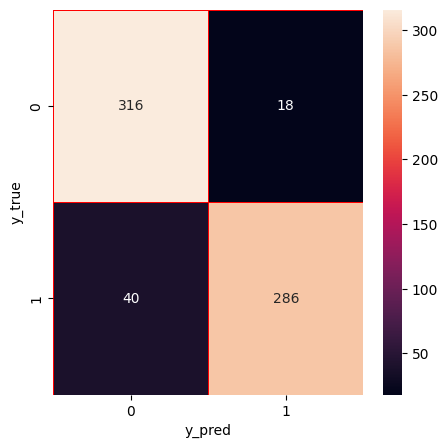

In [32]:
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
y_predict = lgbm.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
tw1a.append(lgbm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM: 1.0
Precision of LightGBM: 1.0
Recall of LightGBM: 1.0
F1-score of LightGBM: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       666
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



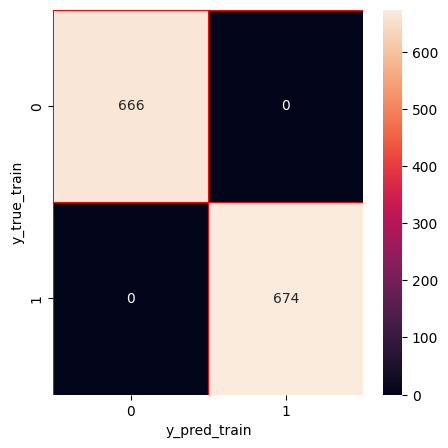

In [33]:
lgbm_score = lgbm.score(X_train, y_train)
y_predict = lgbm.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
ttw1a.append(lgbm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [34]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'num_leaves': int(params['num_leaves']),
        'min_child_samples': int(params['min_child_samples']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree']
    }
    clf = lgb.LGBMClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss':-score, 'status': STATUS_OK }
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'max_depth': hp.quniform('max_depth', 5, 30, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 100, 1),
    'min_child_samples': hp.quniform('min_child_samples', 5, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("LightGBM: Hyperopt estimated optimum {}".format(best))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 674, number of negative: 666
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 1340, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502985 -> initscore=0.011940
[LightGBM] [Info] Start training from score 0.011940
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 674, number of negative: 666
[LightGBM] [Info] Auto-choosing col-wise multi-threadi

[LightGBM] [Info] Number of positive: 674, number of negative: 666
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 1340, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502985 -> initscore=0.011940
[LightGBM] [Info] Start training from score 0.011940
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

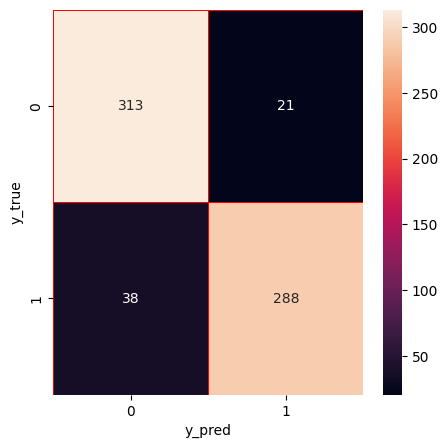

In [35]:
best_params = {
    'n_estimators': 66,
    'max_depth': 14,
    'num_leaves': 41,
    'min_child_samples': 49,
    'learning_rate': 0.2986303001151132,
    'subsample': 0.857450946488747,
    'colsample_bytree': 0.6258411464176556
}
lgbm_hpo = lgb.LGBMClassifier(**best_params, random_state=0)
lgbm_hpo.fit(X_train, y_train)
lgbm_score = lgbm_hpo.score(X_test, y_test)
y_predict = lgbm_hpo.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
th1a.append(lgbm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM (Hyperopt): 1.0
Precision of LightGBM (Hyperopt): 1.0
Recall of LightGBM (Hyperopt): 1.0
F1-score of LightGBM (Hyperopt): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       666
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



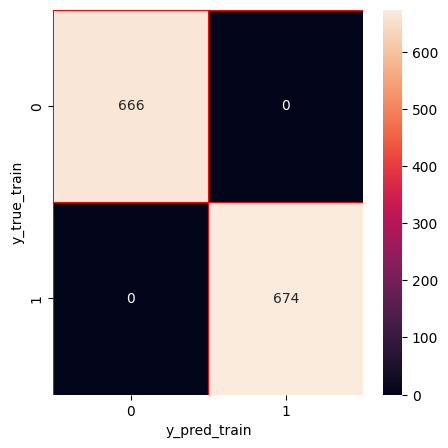

In [36]:
lgbm_score = lgbm_hpo.score(X_train, y_train)
y_predict = lgbm_hpo.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(lgbm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [37]:
lgbm_train=lgbm_hpo.predict(X_train)
lgbm_test=lgbm_hpo.predict(X_test)

Accuracy of AdaBoost: 0.9015151515151515
Precision of AdaBoost: 0.9020927619642298
Recall of AdaBoost: 0.9015151515151515
F1-score of AdaBoost: 0.9014533663661914
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       334
           1       0.92      0.88      0.90       326

    accuracy                           0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



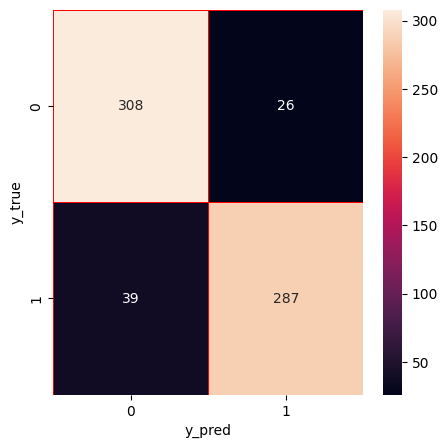

In [38]:
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)
adaboost_score = adaboost.score(X_test, y_test)
y_predict = adaboost.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
tw1a.append(adaboost_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost: 0.9455223880597015
Precision of AdaBoost: 0.9456964584965658
Recall of AdaBoost: 0.9455223880597015
F1-score of AdaBoost: 0.9455204159645364
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       666
           1       0.95      0.94      0.95       674

    accuracy                           0.95      1340
   macro avg       0.95      0.95      0.95      1340
weighted avg       0.95      0.95      0.95      1340



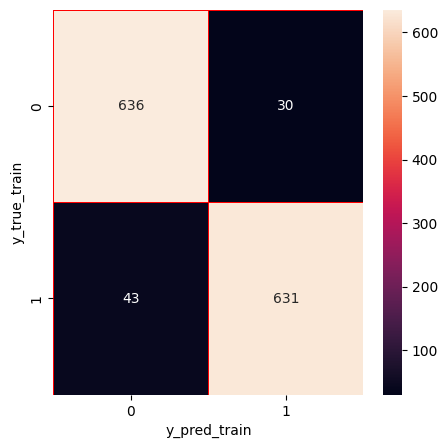

In [39]:
adaboost_score = adaboost.score(X_train, y_train)
y_predict = adaboost.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
ttw1a.append(adaboost_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
    }
    clf = AdaBoostClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss': -score, 'status': STATUS_OK}
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)
print("AdaBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [01:54<00:00,  5.70s/trial, best loss: -0.9196969696969697]
AdaBoost: Hyperopt estimated optimum {'learning_rate': 0.2754916064344046, 'n_estimators': 230.0}


Accuracy of AdaBoost (Hyperopt): 0.9166666666666666
Precision of AdaBoost (Hyperopt): 0.9186334599846538
Recall of AdaBoost (Hyperopt): 0.9166666666666666
F1-score of AdaBoost (Hyperopt): 0.9165299631801718
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       334
           1       0.95      0.88      0.91       326

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



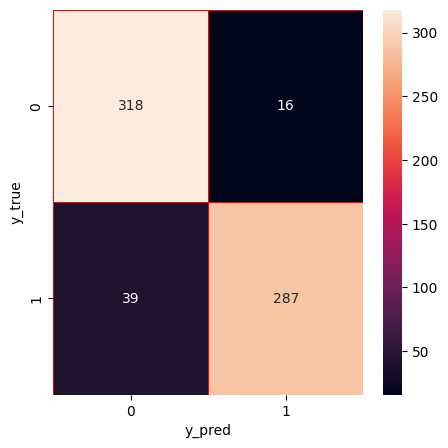

In [41]:
best_params = {
    'n_estimators': 148,
    'learning_rate': 0.23927624627755595,
}
adaboost_hpo = AdaBoostClassifier(**best_params, random_state=0)
adaboost_hpo.fit(X_train, y_train)
adaboost_score = adaboost_hpo.score(X_test, y_test)
y_predict = adaboost_hpo.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
th1a.append(adaboost_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost (Hyperopt): 0.9343283582089552
Precision of AdaBoost (Hyperopt): 0.9345854935893761
Recall of AdaBoost (Hyperopt): 0.9343283582089552
F1-score of AdaBoost (Hyperopt): 0.9343236766151863
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       666
           1       0.95      0.92      0.93       674

    accuracy                           0.93      1340
   macro avg       0.93      0.93      0.93      1340
weighted avg       0.93      0.93      0.93      1340



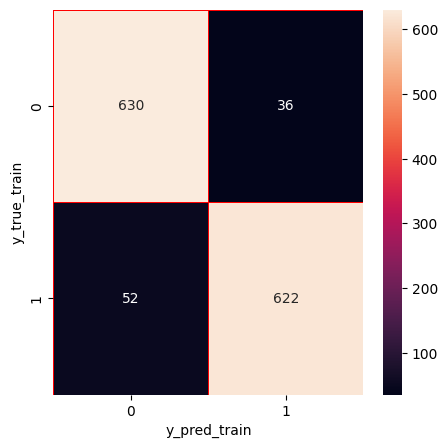

In [42]:
adaboost_score = adaboost_hpo.score(X_train, y_train)
y_predict = adaboost_hpo.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(adaboost_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [43]:
ttw = [ttw1a,ttw1p,ttw1r,ttw1f]
tw = [tw1a,tw1p,tw1r,tw1f]
tth = [tth1a,tth1p,tth1r,tth1f]
th = [th1a,th1p,th1r,th1f]
ttw = pd.DataFrame(ttw).transpose()
ttw.columns = ["Accuracy","Precision","Recall","F1Score"]
ttw.index = ["xgb","rf","dt","et","lgbm","adaboost"]
tw = pd.DataFrame(tw).transpose()
tw.columns = ["Accuracy","Precision","Recall","F1Score"]
tw.index = ["xgb","rf","dt","et","lgbm","adaboost"]
tth = pd.DataFrame(tth).transpose()
tth.columns = ["Accuracy","Precision","Recall","F1Score"]
tth.index = ["xgb","rf","dt","et","lgbm","adaboost"]
th = pd.DataFrame(th).transpose()
th.columns = ["Accuracy","Precision","Recall","F1Score"]
th.index = ["xgb","rf","dt","et","lgbm","adaboost"]

In [44]:
df = pd.concat([ttw,tw,tth,th],axis=1)

In [45]:
df

,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score
xgb,0.983582,0.983739,0.983582,0.983582,0.909091,0.909783,0.909091,0.909027,1.000000,1.000000,1.000000,1.000000,0.912121,0.912629,0.912121,0.912073
rf,1.000000,1.000000,1.000000,1.000000,0.913636,0.915254,0.913636,0.913515,0.945522,0.946260,0.945522,0.945507,0.915152,0.917288,0.915152,0.915002
dt,1.000000,1.000000,1.000000,1.000000,0.845455,0.845483,0.845455,0.845438,0.938060,0.938288,0.938060,0.938056,0.866667,0.868502,0.866667,0.866431
et,1.000000,1.000000,1.000000,1.000000,0.916667,0.918633,0.916667,0.916530,0.933582,0.935752,0.933582,0.933514,0.913636,0.917719,0.913636,0.913367
lgbm,1.000000,1.000000,1.000000,1.000000,0.912121,0.913893,0.912121,0.911988,1.000000,1.000000,1.000000,1.000000,0.910606,0.911644,0.910606,0.910519
adaboost,0.945522,0.945696,0.945522,0.945520,0.901515,0.902093,0.901515,0.901453,0.934328,0.934585,0.934328,0.934324,0.916667,0.918633,0.916667,0.916530


In [46]:
df.to_excel("output2.xlsx")